# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [1]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time, timezone
import json
from dotenv import load_dotenv
import os

load_dotenv()

True

🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [13]:
API_KEY_OWM = os.getenv('API_KEY_OWM')
VC_API_KEY = os.getenv('VC_API_KEY')

TODAY = date.today()
SEVEN_DAYS_AGO = TODAY - timedelta(7)

# on combine la date TODAY avec un time.min qui retourne minuit et on transforme le tout en timestamp
# on fixe la timezone sur utc pour s'assurer d'utiliser la même pour toutes nos apis
TODAY_TIMESTAMP = int(datetime.combine(TODAY, time.min).replace(tzinfo=timezone.utc).timestamp())
SEVEN_DAYS_AGO_TIMESTAMP = int(datetime.combine(SEVEN_DAYS_AGO, time.min).replace(tzinfo=timezone.utc).timestamp())

print(TODAY_TIMESTAMP)

1753747200


In [3]:
def get_city_coordinates(city: str, api_key) -> dict:
    '''
    Récupère les coordonnées (latitude et longitude) d'une ville donnée en utilisant l'API OpenWeatherMap.

    args :
        city (str) : nom de la ville à rechercher.

    returns :
        dict : dictionnaire contenant les informations de la ville dont la latitude ('lat') et la longitude ('lon').
        None : si la ville n'est pas trouvée ou en cas d'erreur.
    '''
    URL = 'http://api.openweathermap.org/geo/1.0/direct'
    params = {
        'q': city,
        'appid': api_key,
        'limit': 1
    }
    try:
        response = requests.get(URL, params=params)

        # gérer l'erreur 401
        if response.status_code == 401:
            print('401 Unauthorized: Invalid API key')
            return None

        data_raw: dict = response.json()[0]

        coords_dict = {
            'city_name': data_raw.get('name'),
            'lat': data_raw.get('lat'),
            'lon': data_raw.get('lon')
        }

        return coords_dict
    
    # gérer le cas où une ville n'est pas valide
    except IndexError:
        print(f'\'{city}\' is not a valid city')
    except Exception as e:
        print(f'error: {e}')

get_city_coordinates('montpellier', API_KEY_OWM)

{'city_name': 'Montpellier', 'lat': 43.6112422, 'lon': 3.8767337}

In [4]:
def get_weather_data(city: str, api_key) -> dict:
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    try:
        city_coords = get_city_coordinates(city, api_key)

        if city_coords == None:
            print(f'Error: Couldn\'t get city data for \'{city}\'')
            return None

        latitude = city_coords['lat']
        longitude = city_coords['lon']

        URL = 'https://api.openweathermap.org/data/2.5/weather'
        params = {
            'lat': latitude,
            'lon': longitude,
            'appid': api_key,
            'units': 'metric',
            'lang': 'fr'
        }

        response = requests.get(URL, params=params)
        print(f'status code: {response.status_code}')
        return response.json()

    except Exception as e:
        print(f'error: {e}')

weather_in_montpellier = get_weather_data('montpellier', API_KEY_OWM)
print(weather_in_montpellier)

status code: 200
{'coord': {'lon': 3.8767, 'lat': 43.6112}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'ciel dégagé', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 28.03, 'feels_like': 27.21, 'temp_min': 27.69, 'temp_max': 28.03, 'pressure': 1014, 'humidity': 32, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 360}, 'clouds': {'all': 0}, 'dt': 1753813145, 'sys': {'type': 2, 'id': 2038454, 'country': 'FR', 'sunrise': 1753763426, 'sunset': 1753816277}, 'timezone': 7200, 'id': 2992166, 'name': 'Montpellier', 'cod': 200}


In [5]:
# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Roma, Lazio", "Amsterdam", "Vienna"] # Changement de 'Rome' pour 'Roma, Lazio' par nécessité de précision pour une API

for city in CITIES:
    weather = get_weather_data(city, API_KEY_OWM)
    print(f'weather in {city}: {weather}\n')

status code: 200
weather in Paris: {'coord': {'lon': 2.32, 'lat': 48.8589}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'ciel dégagé', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18.83, 'feels_like': 18.91, 'temp_min': 17.97, 'temp_max': 19.56, 'pressure': 1019, 'humidity': 82, 'sea_level': 1019, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 270}, 'clouds': {'all': 0}, 'dt': 1753813560, 'sys': {'type': 1, 'id': 6550, 'country': 'FR', 'sunrise': 1753762803, 'sunset': 1753817647}, 'timezone': 7200, 'id': 6545270, 'name': 'Quartier du Palais-Royal', 'cod': 200}

status code: 200
weather in Berlin: {'coord': {'lon': 13.3889, 'lat': 52.517}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'ciel dégagé', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.81, 'feels_like': 19.6, 'temp_min': 18.35, 'temp_max': 21.04, 'pressure': 1013, 'humidity': 67, 'sea_level': 1013, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.6

**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?
- Comment gérer une ville introuvable ?

---

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [ ]:
# Configuration Visual Crossing
VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """
    try:
        URL = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"
        params = {
            'key': api_key,
            'include': 'days',
            'elements': 'datetime,temp,humidity,precip,windspeed,pressure'
        }

        response  = requests.get(URL, params)
        # print(response.status_code)

        # gérer l'erreur 400
        if response.status_code == 400:
            print(f'400 Bad Request: \'{city}\' is not a valid city')
            return None

        # gérer l'erreur 401
        if response.status_code == 401:
            print('401 Unauthorized: Invalid API key')
            return None

        data = response.json()

        weather_list = [
            {
                'date': day.get('datetime'),
                # 'ville': data.get('resolvedAddress'),
                'ville': city,
                'temperature': day.get('temp'),
                "humidite": day.get('humidity'),
                "precipitation": day.get('precip'),
                "vent": day.get('windspeed'),
                # "pressure": day.get('pressure')
            }
            for day in data.get('days')
            ]
        # print(weather_list)

        df_weather = pd.DataFrame(weather_list)

        # on fait en sorte que la colonne date soit du type date, on s'assure de ne garder que la date si le retour de l'api venait à changer, on standardise pour merge le df plus tard
        df_weather['date'] = pd.to_datetime(df_weather['date']).dt.date

        df_weather.head()

        return df_weather
    
    except Exception as e:
        print(f'error: {e}')

get_historical_weather('montpellier', '2000-10-16', '2000-10-17', VC_API_KEY)

object


,date,ville,temperature,humidite,precipitation,vent
0,2000-10-16,montpellier,56.0,83.6,0.034,9.4
1,2000-10-17,montpellier,60.6,68.9,0.000,13.8


### 🎯 Mission pratique
Récupérez les données des 7 (et non 30) derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [7]:
list_cities_weather = []

for i in CITIES:
    city_info = get_historical_weather(i, SEVEN_DAYS_AGO, TODAY, VC_API_KEY)
    list_cities_weather.append(city_info)

df_cities_weather = pd.concat(list_cities_weather)

df_cities_weather.head(80)

object
object
object
object
object
object


,date,ville,temperature,humidite,precipitation,vent
0,2025-07-22,Paris,66.6,71.0,0.002,10.4
1,2025-07-23,Paris,66.6,74.3,0.079,8.4
2,2025-07-24,Paris,65.2,83.8,0.489,9.6
3,2025-07-25,Paris,69.3,72.8,0.000,7.6
4,2025-07-26,Paris,70.6,67.6,0.000,10.0
5,2025-07-27,Paris,65.9,78.8,0.221,14.4
6,2025-07-28,Paris,66.0,65.9,0.000,8.6
7,2025-07-29,Paris,62.8,76.6,0.032,10.3
0,2025-07-22,Berlin,63.5,86.8,0.256,14.4
1,2025-07-23,Berlin,65.1,83.8,1.090,15.5


In [8]:
## Partie 3 : API supplémentaire - Qualité de l'air

### 🌬️ API OpenWeatherMap Air Pollution
def get_air_quality(city, start, end, api_key):
    """
    Récupère les données de qualité de l'air

    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """
    city_coords = get_city_coordinates(city, api_key)

    if city_coords == None:
        return None

    lat = city_coords.get('lat')
    lon = city_coords.get('lon')
    
    URL = 'http://api.openweathermap.org/data/2.5/air_pollution/history'
    params = {
        'lat': lat,
        'lon': lon,
        'start': start,
        'end': end,
        'appid': api_key
    }

    try:
        response = requests.get(URL, params)
        response.raise_for_status()

        response_data = response.json()
        # print(response.url)

        air_quality_info = [{
                'ville': city,
                'date': i.get('dt'),
                'aqi': i.get('main', {}).get('aqi'),
                **i.get('components')
            }
            for i in response_data.get('list')]

        df_air_quality = pd.DataFrame(air_quality_info)

        # convertir le timestamp en datetime puis ne garder que la date
        df_air_quality['date'] = pd.to_datetime(df_air_quality['date'], unit='s').dt.date

        # on groupe par date et par ville pour n'avoir qu'une seule valeur par jour et par ville et on reset index car autrement date et ville deviennent l'index du df ce qu'on ne veut surtout pas
        df_air_quality_day_by_day = df_air_quality.groupby(['date', 'ville']).mean().reset_index()

        return df_air_quality_day_by_day
    except requests.exceptions.HTTPError as http_e:
        if response.status_code == 401:
            print('401 Unauthorized: Invalid API key')
    except Exception as e:
        print(f'error: {e}')

get_air_quality('montpellier', SEVEN_DAYS_AGO_TIMESTAMP, TODAY_TIMESTAMP, API_KEY_OWM)

,date,ville,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2025-07-22,montpellier,1.875000,107.933333,0.073333,0.957500,71.911250,0.267083,2.330000,5.799167,1.432500
1,2025-07-23,montpellier,1.583333,109.961667,0.113333,1.985833,61.035417,0.251250,2.604167,6.193750,1.945000
2,2025-07-24,montpellier,2.000000,119.517917,0.027917,0.983333,67.979167,0.101667,0.758333,2.128750,0.860417
3,2025-07-25,montpellier,2.000000,109.456667,0.049167,0.828333,80.224583,0.104167,1.011250,2.267917,1.231250
4,2025-07-26,montpellier,2.000000,106.713333,0.036250,0.576250,86.440417,0.099583,1.836667,3.348333,1.096250
5,2025-07-27,montpellier,2.000000,101.516667,0.033750,0.551250,72.890833,0.142500,1.879583,3.956250,1.134167
6,2025-07-28,montpellier,2.000000,132.057500,0.041250,0.585417,79.202917,0.190417,1.446250,3.488333,1.290417
7,2025-07-29,montpellier,2.000000,159.430000,0.000000,0.610000,90.130000,0.170000,1.470000,3.070000,1.690000


In [9]:
def get_multiple_cities_air_quality(cities: list, api_key) -> pd.DataFrame:
    city_list = cities
    if not city_list:
        print('List needs to be filled with city names')
        return None

    all_cities_df_list = [get_air_quality(i, SEVEN_DAYS_AGO_TIMESTAMP, TODAY_TIMESTAMP, api_key) for i in city_list]
    
    # on ne garde que le contenu interessant de all_cities_df_list, on gère le cas où une ou plusieurs villes sont invalides
    valid_content = [i for i in all_cities_df_list if i is not None]
    if not valid_content:
        print('No data was returned')
        return None
        
    # on reset index car ils allaient de 0 à 7 puis retournaient à 0
    df_all_cities = pd.concat(valid_content).reset_index(drop=True)

    return df_all_cities

df_air_quality_only = get_multiple_cities_air_quality(CITIES, API_KEY_OWM)

df_air_quality_only

,date,ville,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2025-07-22,Paris,1.500000,95.667083,0.057500,1.082083,58.319583,0.242500,1.695833,3.046667,1.590833
1,2025-07-23,Paris,1.375000,104.633750,0.194167,2.203750,44.929167,0.082083,1.072917,1.562083,1.426667
2,2025-07-24,Paris,1.458333,111.827500,0.093333,2.157917,55.237083,0.186250,2.472083,2.632083,1.012083
3,2025-07-25,Paris,1.416667,110.782083,0.188750,2.003333,59.766250,0.200000,4.155417,4.651250,1.419167
4,2025-07-26,Paris,1.416667,109.020000,0.132917,1.542500,58.380000,0.244583,3.303750,4.622083,1.724167
5,2025-07-27,Paris,1.583333,108.162917,0.062500,1.188750,58.937083,0.272500,2.092917,2.917917,1.682917
6,2025-07-28,Paris,1.791667,147.075000,0.128333,1.570833,74.656667,0.600000,2.357500,3.226667,1.933750
7,2025-07-29,Paris,2.000000,137.370000,0.000000,1.910000,68.220000,0.450000,2.510000,3.380000,3.160000
8,2025-07-22,Berlin,1.541667,117.079583,0.185833,2.698750,62.577917,0.698750,1.009167,1.205833,1.883333
9,2025-07-23,Berlin,1.791667,111.104583,0.137500,2.563333,73.432917,0.775833,1.464583,1.715000,2.271250


In [10]:
# on gère des erreurs
print(get_multiple_cities_air_quality(['qqqqqqq','wwwwwwwww','eeeeeeeeeee'], API_KEY_OWM))
print(get_multiple_cities_air_quality(['montpellier','paris','lyon'], 'API_KEY_OWM'))

'qqqqqqq' is not a valid city
'wwwwwwwww' is not a valid city
'eeeeeeeeeee' is not a valid city
No data was returned
None
401 Unauthorized: Invalid API key
401 Unauthorized: Invalid API key
401 Unauthorized: Invalid API key
No data was returned
None


In [11]:
# on merge deux df df_cities_weather
df_weather_aqi = df_cities_weather.merge(df_air_quality_only, on=['date', 'ville'], how='left')

df_weather_aqi

,date,ville,temperature,humidite,precipitation,vent,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2025-07-22,Paris,66.6,71.0,0.002,10.4,1.500000,95.667083,0.057500,1.082083,58.319583,0.242500,1.695833,3.046667,1.590833
1,2025-07-23,Paris,66.6,74.3,0.079,8.4,1.375000,104.633750,0.194167,2.203750,44.929167,0.082083,1.072917,1.562083,1.426667
2,2025-07-24,Paris,65.2,83.8,0.489,9.6,1.458333,111.827500,0.093333,2.157917,55.237083,0.186250,2.472083,2.632083,1.012083
3,2025-07-25,Paris,69.3,72.8,0.000,7.6,1.416667,110.782083,0.188750,2.003333,59.766250,0.200000,4.155417,4.651250,1.419167
4,2025-07-26,Paris,70.6,67.6,0.000,10.0,1.416667,109.020000,0.132917,1.542500,58.380000,0.244583,3.303750,4.622083,1.724167
5,2025-07-27,Paris,65.9,78.8,0.221,14.4,1.583333,108.162917,0.062500,1.188750,58.937083,0.272500,2.092917,2.917917,1.682917
6,2025-07-28,Paris,66.0,65.9,0.000,8.6,1.791667,147.075000,0.128333,1.570833,74.656667,0.600000,2.357500,3.226667,1.933750
7,2025-07-29,Paris,62.8,76.6,0.032,10.3,2.000000,137.370000,0.000000,1.910000,68.220000,0.450000,2.510000,3.380000,3.160000
8,2025-07-22,Berlin,63.5,86.8,0.256,14.4,1.541667,117.079583,0.185833,2.698750,62.577917,0.698750,1.009167,1.205833,1.883333
9,2025-07-23,Berlin,65.1,83.8,1.090,15.5,1.791667,111.104583,0.137500,2.563333,73.432917,0.775833,1.464583,1.715000,2.271250



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

<Axes: xlabel='ville', ylabel='ville'>

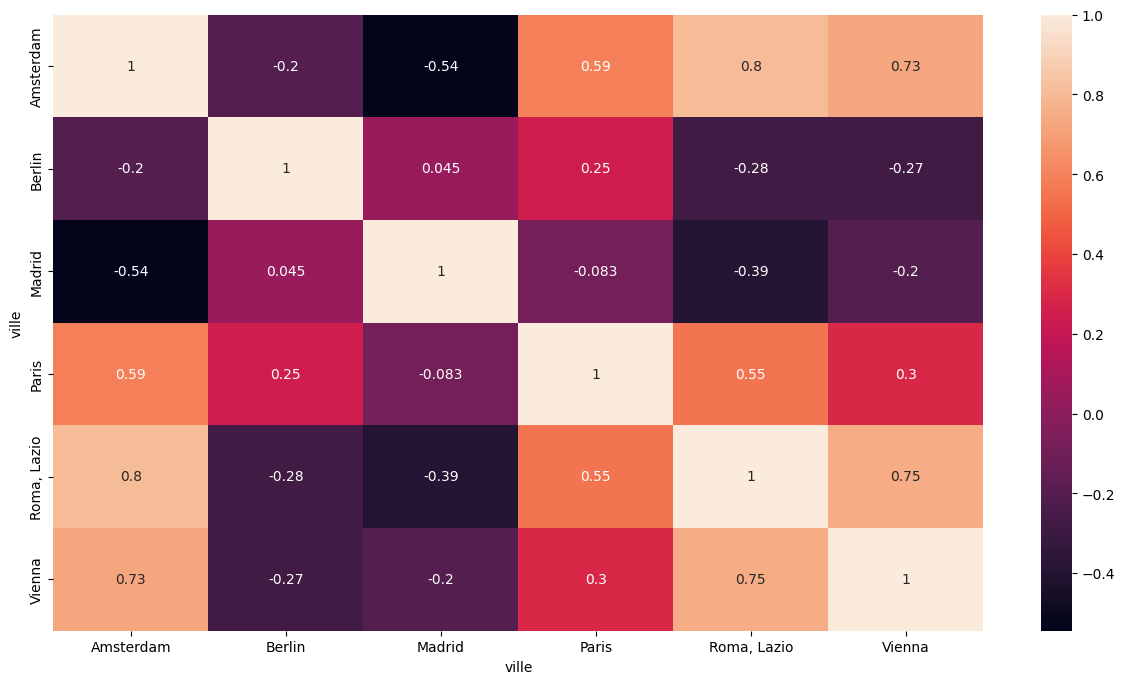

In [16]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()
pivot = df_weather_aqi.pivot_table(values='temperature', index='date', columns='ville')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot.corr(), annot=True)

# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()

# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()

# 4. faire un line chart pour comparer les villes

## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [ ]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [ ]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites